<IPython.core.display.Javascript object>

0
1
2
3
4
5
6
7


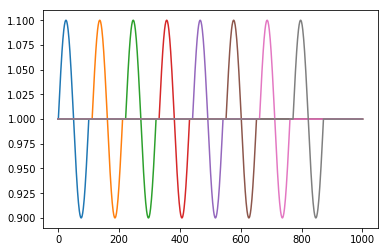

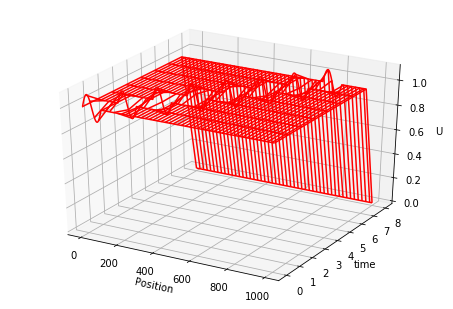

finished
0
1
2
3
4
5
6
7


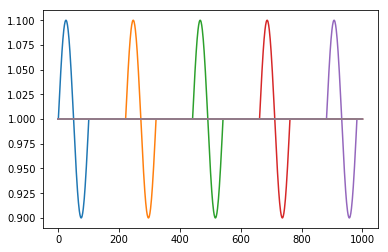

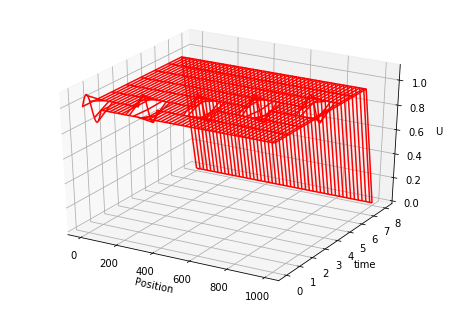

finished
0
1
2
3
4
5
6
7


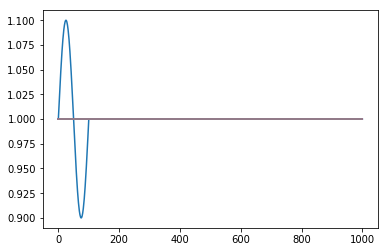

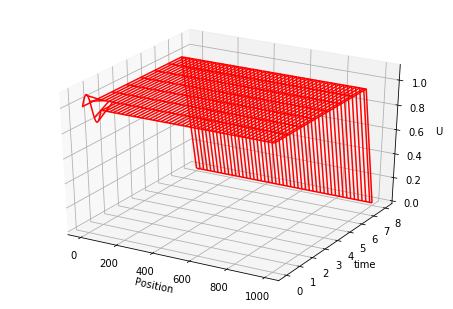

finished


In [3]:
# Burger's equation: Lax Wendroff Method

import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from vpython import *

scene = canvas() # with this you don't need to restart kernel each time

L=100.; Nx=1001; 
tend=80.; Dtout=10.

dx=L/(Nx-1)

x=np.zeros(Nx,float)
U=np.zeros((Nx,2), float)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 
ratios=[1.,.5,.1]
for j in range(3):
    for i in range(Nx):
        x[i]=i*dx
        if  dx*i/10.<1:
            U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
            U[i,1]=U[i,0]
        else:
            U[i,0]=1.0
            U[i,1]=U[i,0]

    toutn=0
    t=0.

    while t < tend:        
        dt=ratios[j]*min(dx/abs((U[:,0]+1.e-10)))
        vel=dx/dt
        for ix in range(1, Nx - 1):
            U[ix, 1] = U[ix,0]-vel*dt/2./dx*(U[ix+1,0]-U[ix-1,0])+(vel*dt/dx)**2/2.*(U[ix+1,0]-2.*U[ix,0]+U[ix-1,0])  
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]   
            print(toutn)   
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
        t+=dt
        ind=int(t/dx)
        sol = curve(pos=[vector(-5.,U[ind,0]*10.-10.,0), vector(-5.+dx,U[ind+1,0]*10.-10.,0)], color = color.yellow)
                            # Plot every other point
        for k in range(2, int(10./dx)): 
            sol.append(vector(-5.+dx*k,U[ind+k,0]*10.-10.,0))
        rate(100)
        for obj in scene.objects:
            obj.visible=0

    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      
    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              
    fig = p.figure()                                          # Create figure
    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("finished") 
    
#With a smaller time step, not as many cycles is needed to solve the equation
#I think the upwind method is better because the computation is not as complex